### Selenium 사용 동적 크롤링 - 주유소

In [1]:
import bs4
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium.webdriver.common.keys import Keys
from selenium import webdriver

#### 사이트에 들어가서 탐색해 본다:

1. 먼저 다음 사이트에 들어가서 살펴본다:  [Opinet](http://www.opinet.co.kr/user/main/mainView.do)
2. 크롬에서 3점 메뉴 버튼을 누르고 **도구 더보기** ==> **개발자 도구**를 선택해서 개발자 도구를 연다.
3. 개발자 도구 왼쪽 상단의 화살표 버튼을 눌러서 사이트 일부를 서택하고 해당 HTML코드를 볼 수 있다. "[CTRL] + [SHIFT] + C" 조합으로 대체할 수 있다.

In [2]:
# os.chdir(r'C:\Users\user\20191125_데이터 수집\notebook')
# 웹드라이버 로딩.
my_driver = webdriver.Chrome('chromedriver.exe') 

In [3]:
# 사이트에 접속.
my_driver.get("http://www.opinet.co.kr")

In [4]:
# 세부 링크로 간다.
my_driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [5]:
# 현재 URL 출력해 본다.
print(my_driver.current_url)

http://www.opinet.co.kr/searRgSelect.do


In [6]:
# 시/도 리스트 가져와 본다.
my_sido = my_driver.find_element_by_css_selector("#SIDO_NM0")
my_sido_list = my_sido.text.split()
my_sido_list.pop(0)        # 첫 번째 값 버림.
print(my_sido_list)

['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']


In [7]:
# 서울시 구 리스트 가져와 본다.
my_sido = my_driver.find_element_by_css_selector("#SIDO_NM0")
my_sido.send_keys(my_sido_list[0])
time.sleep(1)
my_gu = my_driver.find_element_by_css_selector("#SIGUNGU_NM0")
my_gu_list = my_gu.text.split()
my_gu_list.pop(0)          # 첫 번째 값 버림. 
print(my_gu_list)
n_gus = len(my_gu_list)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [8]:
# 서울시 첫 번째 구.
my_sido = my_driver.find_element_by_css_selector("#SIDO_NM0")
my_sido.send_keys(my_sido_list[0])
time.sleep(1)
my_gu = my_driver.find_element_by_css_selector("#SIGUNGU_NM0")
my_gu.send_keys(my_gu_list[0])
time.sleep(1)
my_download = my_driver.find_element_by_css_selector("div.desc_box a") 
my_download.click()
time.sleep(1)

In [9]:
# 나머지 구.
for i in range(n_gus):
    my_gu = my_driver.find_element_by_css_selector("#SIGUNGU_NM0")
    if (i != 0):
        my_gu.send_keys(Keys.DOWN)
        time.sleep(1)
        my_download = my_driver.find_element_by_css_selector("div.desc_box a") 
        my_download.click()
        time.sleep(1)

In [10]:
# 브라우저를 닫는다.
my_driver.close()    

#### 이제 부터는 엑셀 문서를 불러 들여서 이어 붙인다.

In [13]:
# 엑셀 파일 이름을 모아둔다.
os.chdir(r'C:\Users\Kim Ayeong\Downloads')
file_list = os.listdir()
my_excel_files =[]
for x in file_list:
    if x[-3:] == 'xls':
        my_excel_files += [x]

In [14]:
# 읽어 들여서 하나의 데이터 프레임으로 통합한다.
n_excels = len(my_excel_files)
for i in range(n_excels):  
    a_df = pd.read_excel(my_excel_files[i],header=2, na_values = [' ', '-'])
    if i == 0:
        df = a_df
    else:
        df = pd.concat([df,a_df], axis=0, ignore_index=True)

In [15]:
df.shape

(501, 10)

In [16]:
df.head(3)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,NaN,1585.0,1447.0,NaN
1,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-484-9323,N,NaN,1596.0,1457.0,1200.0
2,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,NaN,1596.0,1476.0,1147.0


In [17]:
# 결측치 집계.
(df.isnull()).sum(axis=0)

지역         0
상호         0
주소         0
상표         0
전화번호       0
셀프여부       0
고급휘발유    287
휘발유        7
경유         7
실내등유     293
dtype: int64

In [18]:
# 불필요 컬럼 제거.
df = df.drop(columns = ['고급휘발유','실내등유'])

In [19]:
# 결측치 처리.
df.dropna(axis=0,inplace=True)

In [20]:
# 확인.
df.shape

(494, 8)

In [21]:
# 컬럼은 자료형 주목!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 498
Data columns (total 8 columns):
지역      494 non-null object
상호      494 non-null object
주소      494 non-null object
상표      494 non-null object
전화번호    494 non-null object
셀프여부    494 non-null object
휘발유     494 non-null float64
경유      494 non-null float64
dtypes: float64(2), object(6)
memory usage: 34.7+ KB


In [22]:
# 수치형 (integer)로 변환 (불필요)
# df['휘발유']=df['휘발유'].apply(lambda x: int(x))
# df['경유']=df['경유'].apply(lambda x: int(x))

#### 분석 & 시각화

In [23]:
# 셀프여부별 휘발유 평균가격.
df.groupby('셀프여부')['휘발유'].mean()

셀프여부
N    1701.573883
Y    1569.926108
Name: 휘발유, dtype: float64

In [24]:
# 셀프여부별 경유 평균가격.
df.groupby('셀프여부')['경유'].mean()

셀프여부
N    1540.766323
Y    1406.748768
Name: 경유, dtype: float64

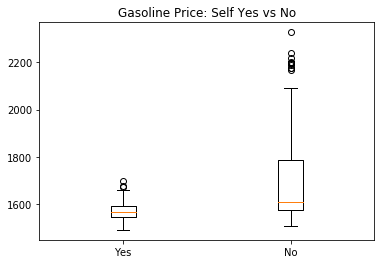

In [25]:
# 셀프여부별 휘발유 가격 시각화.
Yes = df[df.셀프여부 == 'Y'].휘발유
No = df[df.셀프여부 == 'N'].휘발유
plt.boxplot([Yes,No],0,labels=['Yes','No'])
plt.title('Gasoline Price: Self Yes vs No')
plt.show()

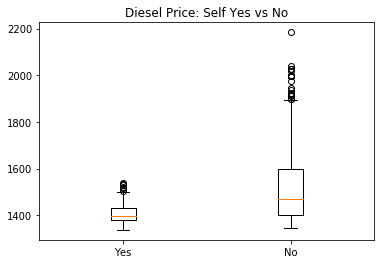

In [26]:
# 셀프여부별 경유 가격 시각화.
Yes = df[df.셀프여부 == 'Y'].경유
No = df[df.셀프여부 == 'N'].경유
plt.boxplot([Yes,No],0,labels=['Yes','No'])
plt.title('Diesel Price: Self Yes vs No')
plt.show()